<a href="https://colab.research.google.com/github/DianaMCV/Redes/blob/main/Comercio%20y%20transportes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Programas

In [ ]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-cairo python3-matplotlib

Executing: /tmp/apt-key-gpghome.kUlRMPg1pI/gpg.1.sh --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: "Tiago de Paula Peixoto <tiago@skewed.de>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://downloa

In [ ]:
! echo deb http://downloads.skewed.de/apt/DISTRIBUTION DISTRIBUTION universe>>/etc/apt/sources.list
! echo deb-src http://downloads.skewed.de/apt/DISTRIBUTION DISTRIBUTION universe>>/etc/apt/sources.list
! cat /etc/apt/sources.list

# See http://help.ubuntu.com/community/UpgradeNotes for how to upgrade to
# newer versions of the distribution.
deb http://archive.ubuntu.com/ubuntu/ bionic main restricted
# deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted

## Major bug fix updates produced after the final release of the
## distribution.
deb http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
# deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted

## N.B. software from this repository is ENTIRELY UNSUPPORTED by the Ubuntu
## team. Also, please note that software in universe WILL NOT receive any
## review or updates from the Ubuntu security team.
deb http://archive.ubuntu.com/ubuntu/ bionic universe
# deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb http://archive.ubuntu.com/ubuntu/ bionic-updates universe
# deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates universe

## N.B. software from this repository is ENTIRELY UNSUPPORTED by the Ubuntu
## team, 

In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.
W: Target Packages (main/binary-amd64/Packages) is configured multiple times in /etc/apt/sources.list:51 and /etc/apt/sources.list:54
W: Target Packages (main/binary-all/Packages) is configured multiple times in /etc/apt/sources.list:51 and /etc/apt/sources.list:54
W: Target Sources (universe/source/Sources) is configured multiple times in /etc/apt/sources.list:53 and /etc/apt/sources.list:56
W: Target Packages (universe/binary-amd64/Packages) is configured multiple times in /etc/apt/sources.list:52 and /etc/apt/sources.list:55

#Paquetería

In [ ]:
#Pquetería
import pandas as pd
import re
import networkx as nx
import graph_tool.all as gt
import numpy as np
import geopandas as gpd  
import matplotlib.pyplot as plt  
import operator
import random

In [194]:
#Bases de datos
url='https://raw.githubusercontent.com/DianaMCV/Redes/main/comercio_2019.csv'
url1='https://raw.githubusercontent.com/DianaMCV/Redes/main/comercio_2020.csv'
url2='https://raw.githubusercontent.com/DianaMCV/Redes/main/comercio_2021.csv'
url3='https://raw.githubusercontent.com/RBESPINOSA/proyecto_redes/main/distancias_final.csv'
c2019 = pd.read_csv(url, index_col=0, encoding='latin-1') 
c2020 = pd.read_csv(url1, index_col=0, encoding='latin-1') 
c2021 = pd.read_csv(url2, index_col=0, encoding='latin-1') 
dist= pd.read_csv(url3, index_col=0, encoding='latin-1') 

##ANÁLISIS DE LA RED DE COMERCIALIZACIÓN DE FRUTAS Y HORTALIZAS, 2019

In [195]:
#DATAFRAME COMERCIO 2019
c2019.columns = c2019.columns.str.lower()
#Quedarse solo con los estados en la columna destino
c2019['destino']=c2019['destino'].apply(lambda x:(re.search('(.+(?=:))', x)).group(1))
#Agrupando
adj_2019 = c2019.groupby(['origen', 'destino']).size().rename('frecuencia').reset_index()
#Eliminamos self-loops
adj_2019=adj_2019[adj_2019['origen']!=adj_2019['destino']]
adj_2019.head()

,origen,destino,frecuencia
1,Aguascalientes,Chihuahua,6
2,Aguascalientes,Durango,24
3,Aguascalientes,Michoacán,12
4,Aguascalientes,Nayarit,18
5,Aguascalientes,Tamaulipas,6


In [ ]:
#RED 2019

G19 = nx.from_pandas_edgelist(
    adj_2019,
    source='origen',
    target='destino',
    edge_attr='frecuencia',
    create_using=nx.DiGraph)

In [ ]:
print("número de aristas", G19.size())
print("número de nodos", G19.order())

número de aristas 355
número de nodos 33


In [ ]:
#in-degree
id=dict(G19.in_degree())
id=pd.DataFrame([[key, id[key]] for key in id.keys()], columns=['estado', 'in-degree'])
id.sort_values(by='in-degree', ascending=False)

,estado,in-degree
2,Durango,22
11,Nuevo León,21
9,Coahuila,20
0,Aguascalientes,17
7,Baja California,17
25,Querétaro,17
17,Distrito Federal,17
13,México,17
20,Morelos,16
22,Puebla,16


In [ ]:
#out-degree
od=dict(G19.out_degree())
od=pd.DataFrame([[key, od[key]] for key in od.keys()], columns=['estado', 'out-degree'])
od.sort_values(by='out-degree', ascending=False)

,estado,out-degree
24,Veracruz,24
30,Importación,23
3,Michoacán,21
22,Puebla,21
6,Zacatecas,20
31,Sinaloa,19
16,Chiapas,17
14,Tabasco,17
27,Colima,16
1,Chihuahua,14


In [ ]:
#betweenness centrality
bc=dict(nx.betweenness_centrality(G19))
bc=pd.DataFrame([[key, bc[key]] for key in bc.keys()], columns=['estado', 'betweenness centrality'])
bc.sort_values(by='betweenness centrality', ascending=False)

,estado,betweenness centrality
24,Veracruz,0.090648
10,Jalisco,0.086069
9,Coahuila,0.073446
22,Puebla,0.062055
17,Distrito Federal,0.061496
13,México,0.039328
6,Zacatecas,0.038901
14,Tabasco,0.038299
3,Michoacán,0.037431
23,Sonora,0.030774


In [ ]:
#average clustering:
#ac=nx.average_clustering(G19)
#print("average clustering=", ac)
#Reciprocidad
#rec=nx.overall_reciprocity(G19)
#print("Reciprocidad=", rec)
#Densidad
#d=nx.density(G19)
#print("densidad=", d)
#Conectividad promedio
#cp=nx.average_node_connectivity(G19)
#print("conectividad promedio=", cp)

In [ ]:
#OTRAS MEDIDAS
#nx.average_degree_connectivity(G19)
#nx.closeness_centrality(G19)
#nx.bridges no esta disponible para redes dirigidas
#nx.center no funciona porque no hay fuerte conectividad
#usarla usando los costos de transporte: nx.bellman_ford_path(G19,'Yucatán', 'Baja California', weight='frecuencia')

**MAPAS: LOS NODOS MÁS IMPORTANTES EN 2019**

**In degree centrality**

In [ ]:
idc=nx.in_degree_centrality(G19)
A=(idc['Aguascalientes'], idc['Colima'], 0, idc['Distrito Federal'] , idc['Morelos'], idc['México'], idc['Hidalgo'], idc['Puebla'], idc['Nuevo León'], idc['Coahuila'], idc['Chihuahua'], idc['Sonora'], idc['Michoacán'], idc['Querétaro'], idc['Guanajuato'], idc['Jalisco'], idc['Zacatecas'], idc['Durango'], idc['Tamaulipas'], idc['Veracruz'], idc['Guerrero'], idc['Sinaloa'], idc['Oaxaca'], idc['Nayarit'], idc['Chiapas'], idc['Tabasco'], idc['Campeche'], idc['Baja California'], idc['Baja California Sur'], idc['San Luis Potosí'], idc['Yucatán'], idc['Quintana Roo'])
B=np.array(A)
B

array([0.53125, 0.03125, 0.     , 0.53125, 0.5    , 0.53125, 0.40625,
       0.5    , 0.65625, 0.625  , 0.4375 , 0.4375 , 0.4375 , 0.53125,
       0.375  , 0.46875, 0.3125 , 0.6875 , 0.1875 , 0.4375 , 0.1875 ,
       0.03125, 0.25   , 0.15625, 0.125  , 0.21875, 0.125  , 0.53125,
       0.15625, 0.375  , 0.1875 , 0.125  ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



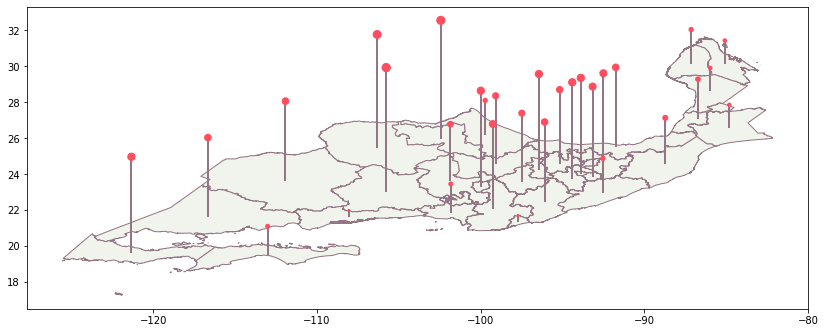

In [ ]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#ff4d5f",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [ ]:
adj_2019[adj_2019['destino']=='Durango']

,origen,destino,frecuencia
2,Aguascalientes,Durango,24
10,Baja California,Durango,6
24,Chiapas,Durango,52
41,Chihuahua,Durango,63
54,Coahuila,Durango,7
69,Colima,Durango,42
99,Guanajuato,Durango,42
113,Guerrero,Durango,13
135,Importación,Durango,122
158,Jalisco,Durango,143


In [ ]:
adj_2019[adj_2019['origen']=='Durango']

,origen,destino,frecuencia
94,Durango,Coahuila,30


Durango es el que tiene mayor in-degree, curiosamente todo su comercio sólo se dirige a Coahuila.

**Out degree centrality**

In [ ]:
odc=nx.out_degree_centrality(G19)
A=(odc['Aguascalientes'], odc['Colima'], 0, odc['Distrito Federal'] , odc['Morelos'], odc['México'], odc['Hidalgo'], odc['Puebla'], odc['Nuevo León'], odc['Coahuila'], odc['Chihuahua'], odc['Sonora'], odc['Michoacán'], odc['Querétaro'], odc['Guanajuato'], odc['Jalisco'], odc['Zacatecas'], odc['Durango'], odc['Tamaulipas'], odc['Veracruz'], odc['Guerrero'], odc['Sinaloa'], odc['Oaxaca'], odc['Nayarit'], odc['Chiapas'], odc['Tabasco'], odc['Campeche'], odc['Baja California'], odc['Baja California Sur'], odc['San Luis Potosí'], odc['Yucatán'], odc['Quintana Roo'])
B=np.array(A)
B

array([0.1875 , 0.5    , 0.     , 0.40625, 0.28125, 0.375  , 0.15625,
       0.65625, 0.15625, 0.375  , 0.4375 , 0.4375 , 0.65625, 0.0625 ,
       0.375  , 0.4375 , 0.625  , 0.03125, 0.21875, 0.75   , 0.4375 ,
       0.59375, 0.375  , 0.34375, 0.53125, 0.53125, 0.09375, 0.15625,
       0.     , 0.09375, 0.03125, 0.     ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



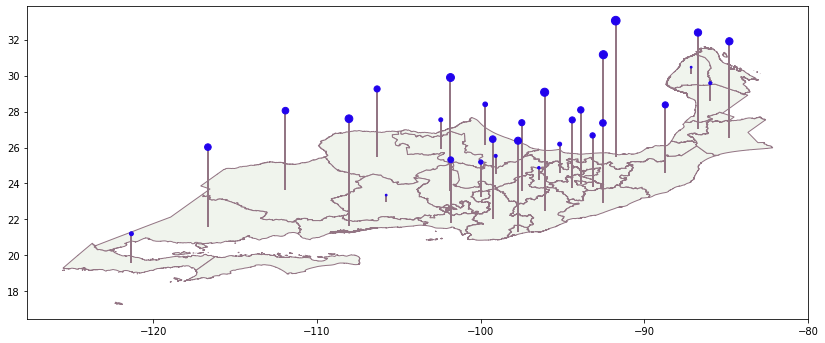

In [ ]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#2102ED",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [ ]:
adj_2019[adj_2019['destino']=='Veracruz']

,origen,destino,frecuencia
34,Chiapas,Veracruz,12
50,Chihuahua,Veracruz,18
62,Coahuila,Veracruz,6
78,Colima,Veracruz,12
92,Distrito Federal,Veracruz,72
123,Guerrero,Veracruz,24
151,Importación,Veracruz,24
188,Michoacán,Veracruz,12
266,Puebla,Veracruz,576
270,Querétaro,Veracruz,6


Veracruz tiene el mayor out-degree. Uno de sus fuentes más importantes son las importaciones. Sin embargo, Chihuhua, un estado del norte, envía directamente mercancías a Veracruz.



**Betweenness Centrality**

In [ ]:
bc=nx.betweenness_centrality(G19)
A=(bc['Aguascalientes'], bc['Colima'], 0, bc['Distrito Federal'] , bc['Morelos'], bc['México'], bc['Hidalgo'], bc['Puebla'], bc['Nuevo León'], bc['Coahuila'], bc['Chihuahua'], bc['Sonora'], bc['Michoacán'], bc['Querétaro'], bc['Guanajuato'], bc['Jalisco'], bc['Zacatecas'], bc['Durango'], bc['Tamaulipas'], bc['Veracruz'], bc['Guerrero'], bc['Sinaloa'], bc['Oaxaca'], bc['Nayarit'], bc['Chiapas'], bc['Tabasco'], bc['Campeche'], bc['Baja California'], bc['Baja California Sur'], bc['San Luis Potosí'], bc['Yucatán'], bc['Quintana Roo'])
B=np.array(A)
B

array([0.02329322, 0.00115738, 0.        , 0.06149642, 0.01258685,
       0.03932781, 0.00343336, 0.06205537, 0.01860929, 0.07344605,
       0.02180524, 0.03077363, 0.03743071, 0.00241066, 0.01136562,
       0.0860689 , 0.03890054, 0.00069918, 0.00502197, 0.09064801,
       0.00488831, 0.00125341, 0.00698962, 0.0038676 , 0.0041337 ,
       0.0382993 , 0.02923387, 0.01172174, 0.        , 0.00206227,
       0.00081028, 0.        ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



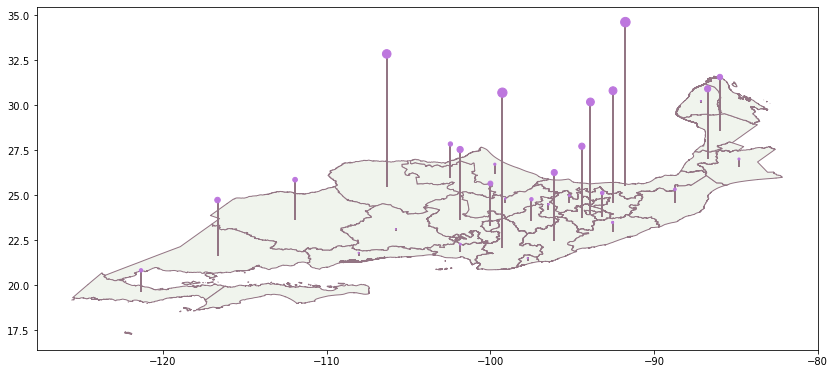

In [ ]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*100})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#35B55F",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

##ANÁLISIS DE LA RED DE COMERCIALIZACIÓN DE FRUTAS Y HORTALIZAS, 2020

DataFrame 2020

In [ ]:
#DATAFRAME COMERCIO 2020

c2020.columns = c2020.columns.str.lower()
#Quedarse solo con los estados en la columna destino
c2020['destino']=c2020['destino'].apply(lambda x:(re.search('(.+(?=:))', x)).group(1))
#Agrupando
adj_2020 = c2020.groupby(['origen', 'destino']).size().rename('peso').reset_index()
#Eliminamos self-loops
adj_2020=adj_2020[adj_2020['origen']!=adj_2020['destino']]
adj_2020.head()

,origen,destino,peso
1,Aguascalientes,Chihuahua,12
2,Aguascalientes,Coahuila,6
3,Aguascalientes,Durango,25
4,Aguascalientes,Guanajuato,6
5,Aguascalientes,Michoacán,12


Red 2020

In [ ]:
#RED 2020

G20 = nx.from_pandas_edgelist(
    adj_2020,
    source='origen',
    target='destino',
    edge_attr='peso',
    create_using=nx.DiGraph)

In [ ]:
print("número de aristas", G20.size())
print("número de nodos", G20.order())

número de aristas 353
número de nodos 34


In-degree

In [ ]:
#in-degree
id=dict(G20.in_degree())
id=pd.DataFrame([[key, id[key]] for key in id.keys()], columns=['estado', 'in-degree'])
id.sort_values(by='in-degree', ascending=False)

,estado,in-degree
12,Nuevo León,22
3,Durango,21
11,México,21
2,Coahuila,18
19,Distrito Federal,18
0,Aguascalientes,17
16,Querétaro,17
6,Puebla,16
1,Chihuahua,15
5,Michoacán,15


Out degree

In [ ]:
#out-degree
od=dict(G20.out_degree())
od=pd.DataFrame([[key, od[key]] for key in od.keys()], columns=['estado', 'out-degree'])
od.sort_values(by='out-degree', ascending=False)

,estado,out-degree
24,Veracruz,22
29,Importación,21
6,Puebla,21
5,Michoacán,20
8,Zacatecas,19
30,Sinaloa,19
18,Chiapas,16
26,Tabasco,16
25,Colima,15
27,Guerrero,14


Betweenness Centrality

In [ ]:
#betweenness centrality
bc=dict(nx.betweenness_centrality(G20))
bc=pd.DataFrame([[key, bc[key]] for key in bc.keys()], columns=['estado', 'betweenness centrality'])
bc.sort_values(by='betweenness centrality', ascending=False)

,estado,betweenness centrality
11,México,0.117365
19,Distrito Federal,0.094612
6,Puebla,0.080249
21,Jalisco,0.053791
2,Coahuila,0.051931
12,Nuevo León,0.051152
24,Veracruz,0.036989
8,Zacatecas,0.036604
9,Baja California,0.034115
5,Michoacán,0.030209


MAPAS: LOS NODOS MÁS IMPORTANTES EN 2020

In [ ]:
idc=nx.in_degree_centrality(G20)
A=(idc['Aguascalientes'], idc['Colima'], 0, idc['Distrito Federal'] , idc['Morelos'], idc['México'], idc['Hidalgo'], idc['Puebla'], idc['Nuevo León'], idc['Coahuila'], idc['Chihuahua'], idc['Sonora'], idc['Michoacán'], idc['Querétaro'], idc['Guanajuato'], idc['Jalisco'], idc['Zacatecas'], idc['Durango'], idc['Tamaulipas'], idc['Veracruz'], idc['Guerrero'], idc['Sinaloa'], idc['Oaxaca'], idc['Nayarit'], idc['Chiapas'], idc['Tabasco'], idc['Campeche'], idc['Baja California'], idc['Baja California Sur'], idc['San Luis Potosí'], idc['Yucatán'], idc['Quintana Roo'])
B=np.array(A)
B

array([0.51515152, 0.03030303, 0.        , 0.54545455, 0.42424242,
       0.63636364, 0.42424242, 0.48484848, 0.66666667, 0.54545455,
       0.45454545, 0.45454545, 0.45454545, 0.51515152, 0.39393939,
       0.45454545, 0.3030303 , 0.63636364, 0.18181818, 0.39393939,
       0.12121212, 0.06060606, 0.21212121, 0.        , 0.12121212,
       0.21212121, 0.12121212, 0.42424242, 0.18181818, 0.42424242,
       0.27272727, 0.03030303])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



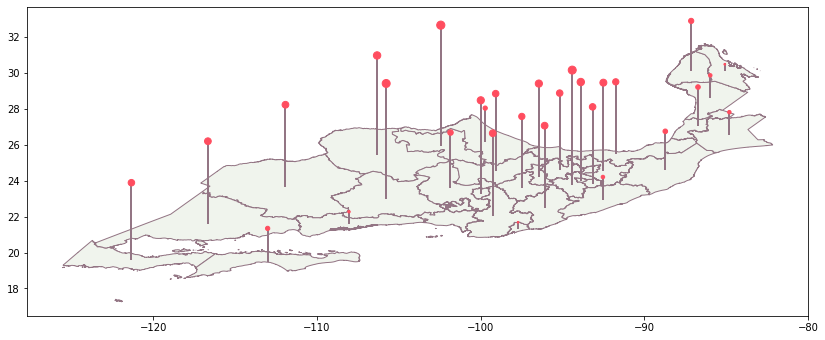

In [ ]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#ff4d5f",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [ ]:
odc=nx.out_degree_centrality(G20)
A=(odc['Aguascalientes'], odc['Colima'], 0, odc['Distrito Federal'] , odc['Morelos'], odc['México'], odc['Hidalgo'], odc['Puebla'], odc['Nuevo León'], odc['Coahuila'], odc['Chihuahua'], odc['Sonora'], odc['Michoacán'], odc['Querétaro'], odc['Guanajuato'], odc['Jalisco'], odc['Zacatecas'], odc['Durango'], odc['Tamaulipas'], odc['Veracruz'], odc['Guerrero'], odc['Sinaloa'], odc['Oaxaca'], odc['Nayarit'], odc['Chiapas'], odc['Tabasco'], odc['Campeche'], odc['Baja California'], odc['Baja California Sur'], odc['San Luis Potosí'], odc['Yucatán'], odc['Quintana Roo'])
B=np.array(A)
B

array([0.24242424, 0.45454545, 0.        , 0.39393939, 0.3030303 ,
       0.39393939, 0.15151515, 0.63636364, 0.18181818, 0.33333333,
       0.42424242, 0.3030303 , 0.60606061, 0.03030303, 0.39393939,
       0.39393939, 0.57575758, 0.03030303, 0.18181818, 0.66666667,
       0.42424242, 0.57575758, 0.39393939, 0.3030303 , 0.48484848,
       0.48484848, 0.09090909, 0.18181818, 0.03030303, 0.        ,
       0.06060606, 0.03030303])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



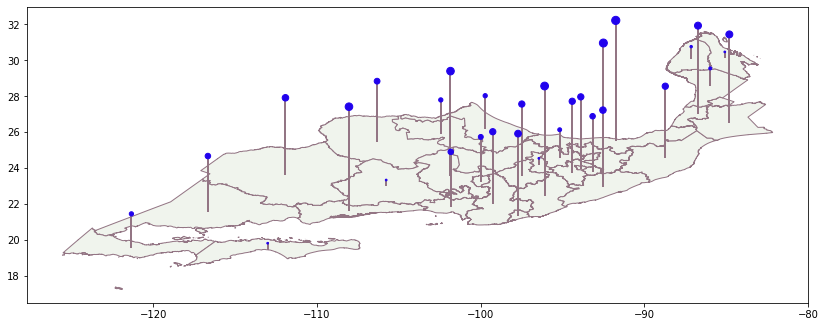

In [ ]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#2102ED",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [ ]:
bc=nx.betweenness_centrality(G20)
A=(bc['Aguascalientes'], bc['Colima'], 0, bc['Distrito Federal'] , bc['Morelos'], bc['México'], bc['Hidalgo'], bc['Puebla'], bc['Nuevo León'], bc['Coahuila'], bc['Chihuahua'], bc['Sonora'], bc['Michoacán'], bc['Querétaro'], bc['Guanajuato'], bc['Jalisco'], bc['Zacatecas'], bc['Durango'], bc['Tamaulipas'], bc['Veracruz'], bc['Guerrero'], bc['Sinaloa'], bc['Oaxaca'], bc['Nayarit'], bc['Chiapas'], bc['Tabasco'], bc['Campeche'], bc['Baja California'], bc['Baja California Sur'], bc['San Luis Potosí'], bc['Yucatán'], bc['Quintana Roo'])
B=np.array(A)
B

array([0.01936724, 0.00082901, 0.        , 0.09461187, 0.01353288,
       0.11736505, 0.0038822 , 0.08024884, 0.05115186, 0.05193121,
       0.02340224, 0.02641673, 0.03020912, 0.00132686, 0.0153976 ,
       0.05379126, 0.03660417, 0.00114689, 0.00234905, 0.03698929,
       0.00211681, 0.00239342, 0.00418662, 0.        , 0.00288228,
       0.01669286, 0.00121002, 0.03411462, 0.00069444, 0.        ,
       0.02894345, 0.        ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



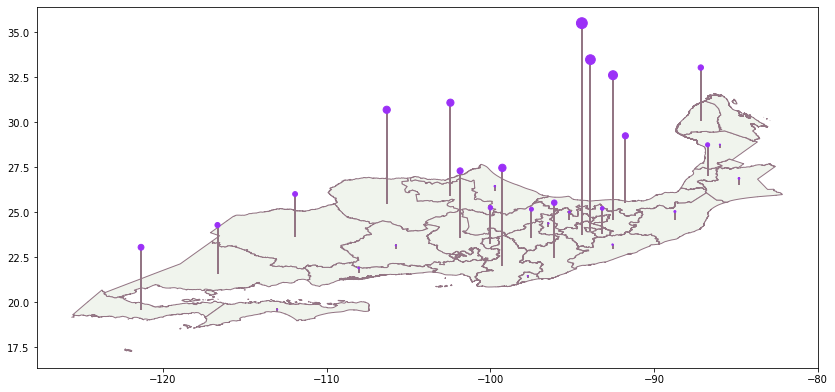

In [ ]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*100})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#9B30F7",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

##ANÁLISIS DE LA RED DE COMERCIALIZACIÓN DE FRUTAS Y HORTALIZAS, 2021

DataFrame 2021

In [ ]:
#DATAFRAME COMERCIO 2021

c2021.columns = c2021.columns.str.lower()
#Quedarse solo con los estados en la columna destino
c2021['destino']=c2021['destino'].apply(lambda x:(re.search('(.+(?=:))', x)).group(1))
#Agrupando
adj_2021 = c2021.groupby(['origen', 'destino']).size().rename('peso').reset_index()
#Eliminamos self-loops
adj_2021=adj_2021[adj_2021['origen']!=adj_2021['destino']]
adj_2021.head()

,origen,destino,peso
1,Aguascalientes,Chihuahua,6
2,Aguascalientes,Coahuila,6
3,Aguascalientes,Durango,6
4,Aguascalientes,Michoacán,18
5,Aguascalientes,San Luis Potosí,6


Red 2021

In [ ]:
#RED 2021

G21 = nx.from_pandas_edgelist(
    adj_2021,
    source='origen',
    target='destino',
    edge_attr='peso',
    create_using=nx.DiGraph)

In degree

In [ ]:
#in-degree
id=dict(G21.in_degree())
id=pd.DataFrame([[key, id[key]] for key in id.keys()], columns=['estado', 'in-degree'])
id.sort_values(by='in-degree', ascending=False)

,estado,in-degree
12,México,20
13,Nuevo León,20
2,Coahuila,18
0,Aguascalientes,17
24,Querétaro,17
14,Sonora,17
16,Morelos,17
3,Durango,17
1,Chihuahua,15
22,Puebla,15


Out degree

In [ ]:
#out-degree
od=dict(G21.out_degree())
od=pd.DataFrame([[key, od[key]] for key in od.keys()], columns=['estado', 'out-degree'])
od.sort_values(by='out-degree', ascending=False)

,estado,out-degree
28,Importación,22
4,Michoacán,20
7,Veracruz,20
22,Puebla,19
29,Sinaloa,19
8,Zacatecas,18
25,Tabasco,16
26,Colima,15
23,Guanajuato,15
18,Chiapas,15


Betweenness Centrality

In [ ]:
#betweenness centrality
bc=dict(nx.betweenness_centrality(G21))
bc=pd.DataFrame([[key, bc[key]] for key in bc.keys()], columns=['estado', 'betweenness centrality'])
bc.sort_values(by='betweenness centrality', ascending=False)

,estado,betweenness centrality
12,México,0.096700
11,Jalisco,0.082661
22,Puebla,0.074456
2,Coahuila,0.054490
15,Campeche,0.054435
7,Veracruz,0.053707
19,Distrito Federal,0.040372
9,Baja California,0.038994
4,Michoacán,0.037110
16,Morelos,0.032295


MAPAS: LOS NODOS MÁS IMPORTANTES EN 2021

In [ ]:
idc=nx.in_degree_centrality(G21)
A=(idc['Aguascalientes'], idc['Colima'], 0, idc['Distrito Federal'] , idc['Morelos'], idc['México'], idc['Hidalgo'], idc['Puebla'], idc['Nuevo León'], idc['Coahuila'], idc['Chihuahua'], idc['Sonora'], idc['Michoacán'], idc['Querétaro'], idc['Guanajuato'], idc['Jalisco'], idc['Zacatecas'], idc['Durango'], idc['Tamaulipas'], idc['Veracruz'], idc['Guerrero'], idc['Sinaloa'], idc['Oaxaca'], idc['Nayarit'], idc['Chiapas'], idc['Tabasco'], idc['Campeche'], idc['Baja California'], idc['Baja California Sur'], idc['San Luis Potosí'], idc['Yucatán'], idc['Quintana Roo'])
B=np.array(A)
B

array([0.53125, 0.03125, 0.     , 0.46875, 0.53125, 0.625  , 0.40625,
       0.46875, 0.625  , 0.5625 , 0.46875, 0.53125, 0.46875, 0.53125,
       0.34375, 0.4375 , 0.3125 , 0.53125, 0.1875 , 0.4375 , 0.125  ,
       0.03125, 0.21875, 0.     , 0.125  , 0.21875, 0.125  , 0.375  ,
       0.15625, 0.46875, 0.3125 , 0.     ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



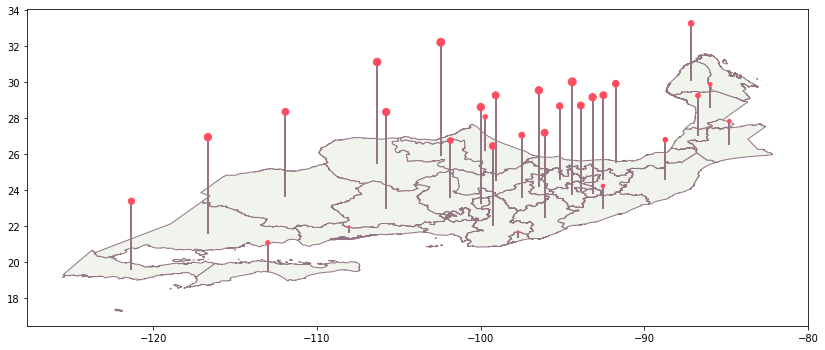

In [ ]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#ff4d5f",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [ ]:
odc=nx.out_degree_centrality(G21)
A=(odc['Aguascalientes'], odc['Colima'], 0, odc['Distrito Federal'] , odc['Morelos'], odc['México'], odc['Hidalgo'], odc['Puebla'], odc['Nuevo León'], odc['Coahuila'], odc['Chihuahua'], odc['Sonora'], odc['Michoacán'], odc['Querétaro'], odc['Guanajuato'], odc['Jalisco'], odc['Zacatecas'], odc['Durango'], odc['Tamaulipas'], odc['Veracruz'], odc['Guerrero'], odc['Sinaloa'], odc['Oaxaca'], odc['Nayarit'], odc['Chiapas'], odc['Tabasco'], odc['Campeche'], odc['Baja California'], odc['Baja California Sur'], odc['San Luis Potosí'], odc['Yucatán'], odc['Quintana Roo'])
B=np.array(A)
B

array([0.25   , 0.46875, 0.     , 0.375  , 0.25   , 0.4375 , 0.15625,
       0.59375, 0.15625, 0.34375, 0.4375 , 0.15625, 0.625  , 0.     ,
       0.46875, 0.40625, 0.5625 , 0.03125, 0.25   , 0.625  , 0.3125 ,
       0.59375, 0.4375 , 0.4375 , 0.46875, 0.5    , 0.09375, 0.1875 ,
       0.03125, 0.15625, 0.03125, 0.03125])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



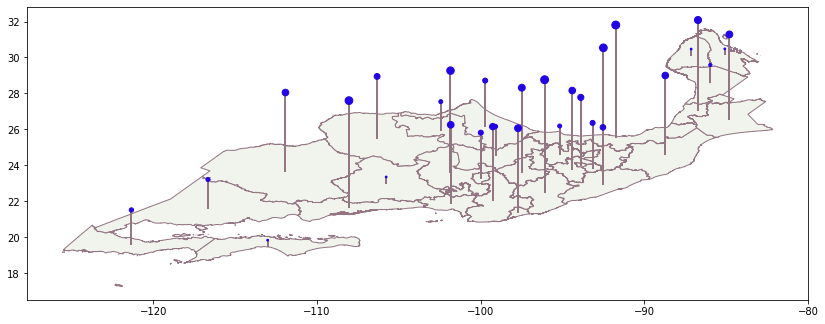

In [ ]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#2102ED",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [ ]:
bc=nx.betweenness_centrality(G21)
A=(bc['Aguascalientes'], bc['Colima'], 0, bc['Distrito Federal'] , bc['Morelos'], bc['México'], bc['Hidalgo'], bc['Puebla'], bc['Nuevo León'], bc['Coahuila'], bc['Chihuahua'], bc['Sonora'], bc['Michoacán'], bc['Querétaro'], bc['Guanajuato'], bc['Jalisco'], bc['Zacatecas'], bc['Durango'], bc['Tamaulipas'], bc['Veracruz'], bc['Guerrero'], bc['Sinaloa'], bc['Oaxaca'], bc['Nayarit'], bc['Chiapas'], bc['Tabasco'], bc['Campeche'], bc['Baja California'], bc['Baja California Sur'], bc['San Luis Potosí'], bc['Yucatán'], bc['Quintana Roo'])
B=np.array(A)
B

array([0.02203524, 0.00090806, 0.        , 0.04037175, 0.03229548,
       0.09670001, 0.00432148, 0.07445611, 0.02171675, 0.05449021,
       0.0298366 , 0.00844894, 0.03710961, 0.        , 0.01594562,
       0.08266065, 0.02891069, 0.        , 0.00593198, 0.05370702,
       0.00130608, 0.00111967, 0.00826501, 0.        , 0.00311491,
       0.01393426, 0.05443548, 0.03899429, 0.00056704, 0.0101602 ,
       0.03043429, 0.        ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



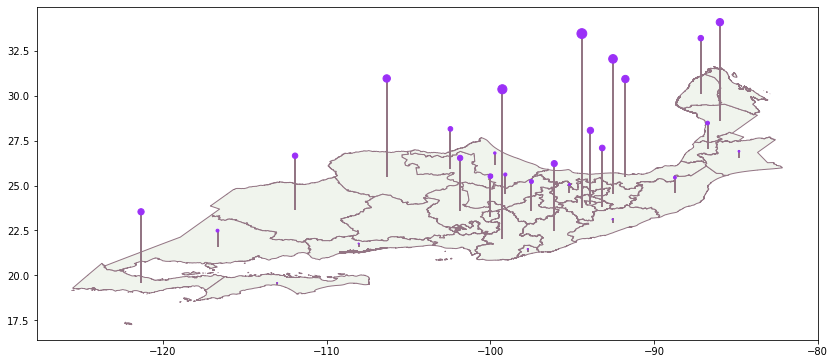

In [ ]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*100})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#9B30F7",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

##RED DE TRANSPORTE

Data Frame, transporte

In [196]:
#Promediamos los costos, distancia, tiempo, etc, para cada estado:
dist=dist.groupby(['edo_origen', 'edo_destino'])[['distancia(km)', 'cost_combustible(MXN)', 'cost_casetas(MXN)', 'cost_total(MXN)', 'tiempo(hrs)']].mean().reset_index()
dist=dist.explode('edo_destino')
#Eliminando caracteres extraños
dist['edo_destino']=dist['edo_destino'].str.replace('Ã©','é').str.replace('Ã¡','á').str.replace('Ã³','ó').str.replace('Ã­','í')
dist['edo_origen']=dist['edo_origen'].str.replace('Ã©','é').str.replace('Ã¡','á').str.replace('Ã³','ó').str.replace('Ã­','í')
#Renombarndo columnas
dist=dist.rename(columns={'edo_destino':'destino', 'edo_origen':'origen', 'distancia(km)':'distancia', 'cost_combustible(MXN)':'cost_combustible', 'cost_casetas(MXN)':'cost_casetas', 'cost_total(MXN)':'cost_total', 'tiempo(hrs)':'tiempo'})
dist.head()

,origen,destino,distancia,cost_combustible,cost_casetas,cost_total,tiempo
0,Aguascalientes,Baja California,2279.52,4027.2,2560.0,6587.2,22.566667
1,Aguascalientes,Baja California Sur,3910.49,6908.5,2929.0,9837.5,42.983333
2,Aguascalientes,Campeche,1625.44,2871.6,2200.0,5071.6,16.300000
3,Aguascalientes,Chiapas,1332.60,2354.3,2120.0,4474.3,12.416667
4,Aguascalientes,Chihuahua,959.14,1694.5,920.0,2614.5,9.833333


In [197]:
#De la red de comercialización de 2019 eliminamos los orígenes: 'importación' y 'nacional', pues de ello no tenemos costos de transporte
adj_2019_1=adj_2019.drop(range(130,153), axis=0)
adj_2019_1=adj_2019_1.drop([213,214], axis=0)

In [198]:
#Uniendo las bases de datos
ADJ_2019=pd.merge(adj_2019_1, dist, how='left',on=('origen','destino'))

**Ánalisis de los costos de transporte**

In [279]:
#RED AUMENTADA 2019
G19_1 = nx.from_pandas_edgelist(
    ADJ_2019,
    source='origen',
    target='destino',
    edge_attr='cost_total',
    create_using=nx.DiGraph)

In [280]:
#Ruta más barata
ADJ_2019['ruta más barata']=None
ADJ_2019['costo de la ruta más barata']=None

for indice, fila in ADJ_2019.iterrows():
  ADJ_2019['ruta más barata'].iloc[indice]=nx.bellman_ford_path(G19_1,fila['origen'],fila['destino'],weight='cost_total')
  ADJ_2019['costo de la ruta más barata'].iloc[indice]=nx.bellman_ford_path_length(G19_1,fila['origen'],fila['destino'],weight='cost_total')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Análisis de la distancia recorrida**

In [273]:
#RED AUMENTADA 2019
G19_2 = nx.from_pandas_edgelist(
    ADJ_2019,
    source='origen',
    target='destino',
    edge_attr='distancia',
    create_using=nx.DiGraph)

In [274]:
#Ruta más corta
ADJ_2019['ruta más corta']=None
ADJ_2019['distancia de la ruta más corta']=None

for indice, fila in ADJ_2019.iterrows():
  ADJ_2019['ruta más corta'].iloc[indice]=nx.bellman_ford_path(G19_2,fila['origen'],fila['destino'],weight='distancia')
  ADJ_2019['distancia de la ruta más corta'].iloc[indice]=nx.bellman_ford_path_length(G19_2,fila['origen'],fila['destino'],weight='distancia')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Ánalisis de el tiempo de transporte**

In [276]:
#RED AUMENTADA 2019
G19_3 = nx.from_pandas_edgelist(
    ADJ_2019,
    source='origen',
    target='destino',
    edge_attr='tiempo',
    create_using=nx.DiGraph)

In [277]:
#Ruta más rápida
ADJ_2019['ruta más rápida']=None
ADJ_2019['tiempo de la ruta más rápida']=None

for indice, fila in ADJ_2019.iterrows():
  ADJ_2019['ruta más rápida'].iloc[indice]=nx.bellman_ford_path(G19_3,fila['origen'],fila['destino'],weight='tiempo')
  ADJ_2019['tiempo de la ruta más rápida'].iloc[indice]=nx.bellman_ford_path_length(G19_3,fila['origen'],fila['destino'],weight='tiempo')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [286]:
#Resumen sobre el costo de transporte
Trns_2019=ADJ_2019.drop(['frecuencia', 'distancia','cost_casetas','cost_total','cost_combustible','tiempo', 'Ruta más barata','Costo de la ruta más barata', 'Ruta más corta', 'Distancia de la ruta más corta', 'ruta más barata', 'costo de la ruta más barata', 'ruta más corta', 'distancia de la ruta más corta', 'ruta más rápida','tiempo de la ruta más rápida' ], axis=1)
Trns_2019["minimización de costo"] = np.where(ADJ_2019["cost_total"] == ADJ_2019["costo de la ruta más barata"], 'Óptimo', 'No óptimo')
Trns_2019["minimización de distancia"] = np.where(ADJ_2019["distancia"] == ADJ_2019["distancia de la ruta más corta"], 'Óptimo', 'No óptimo')
Trns_2019["minimización de tiempo"] = np.where(ADJ_2019["tiempo"] == ADJ_2019["tiempo de la ruta más rápida"], 'Óptimo', 'No óptimo')
Trns_2019

In [ ]:
#Grafico de dona
plot = Trns_2019['minimización de costo'].value_counts().plot(kind='pie', autopct='%1.f%%',  
                                                              colors=['#A00B9F','#B24CC5'],
                                                              figsize=(6, 6),
                                                              explode=[0.03,0.03],
                                                              shadow=True,
                                                              wedgeprops=dict(width=0.7),
                                                              title='Minimiación de costos de transporte')

In [ ]:
#Grafico de barras
plot = Trns_2019['minimización de costo'].value_counts().plot(kind='bar',
                                            title='Optimizacion')

*MAPA: https://medium.com/@gamoles/crea-un-mapa-en-proyeccion-2-5d-796ffd068e0d
*COLORES: https://www.htmlcsscolor.com/random-colors